# Esame COVID Erik Moro

Importo le librerie necessarie per realizzare il programma, ovvero numpy, matplotlib e pandas

In [1062]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson
import emcee
from scipy.optimize import minimize
import pygtc

# Parte 1

Dopo aver scaricato il file contenete i valori covid e rinominato per comodità personale covid.csv, attraverso la libreria
pandas lo leggo e lo trasformo in un dataframe

In [1063]:
dati = pd.read_csv('covid.csv', delimiter=',')

Seleziono solamente le righe contenenti i dati della regione interessata, ovvero in questo caso il Friuli Venezia Giulia e creo
una tabella con solo quei dati e la chiamo dati1 e definisco la variabile stringa con il valore che mi interssa
analizzare, qui la consegna chiedeva di analizzare i nuovi positivi.

In [1064]:
regione=str('Friuli Venezia Giulia')
var=str('nuovi_positivi')
dati1=dati2[dati['denominazione_regione']==regione]
dati1.reset_index(drop=True)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,NaN,NaN,0,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,2023-10-28T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,118,2,120,783,903,5,71,581502,6250,NaN,NaN,588655,7824666,1272166.0,NaN,0.0,NaN,NaN,241031.0,347624.0,3879223.0,3945443.0,ITH,ITH4
1343,2023-10-29T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,117,2,119,723,842,-61,63,581623,6253,NaN,NaN,588718,7824961,1272195.0,NaN,0.0,NaN,NaN,241036.0,347682.0,3879285.0,3945676.0,ITH,ITH4
1344,2023-10-30T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,120,4,124,672,796,-46,41,581709,6254,NaN,NaN,588759,7825120,1272228.0,NaN,2.0,NaN,NaN,241039.0,347720.0,3879301.0,3945819.0,ITH,ITH4
1345,2023-10-31T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,110,2,112,702,814,18,133,581823,6254,NaN,NaN,588891,7825888,1272313.0,Il totale del caso positivi è stato ridotto di...,1.0,NaN,NaN,241054.0,347837.0,3879484.0,3946404.0,ITH,ITH4


Costruisco un set di valori, dove per le x rappresentantano i giorni passati da quando ho cominciato
a raccogliere dati. Costruisco una lista di numeri dall'1 al numero di giorni presenti nel dataframe,
mentre per le y estrapolo dal dataframe con solo i valori del Friuli Venezia Giulia solamente la colonna
dei nuovi positivi

In [1065]:
x=[i for i in range(len(dati1))]
y=dati1[var]

Grafico dunque l'andamento di y in funzione di x grazie alle funzioni di matplotlib. I picchi che noto nel grafico saranno i massimi delle varie ondate di contagi

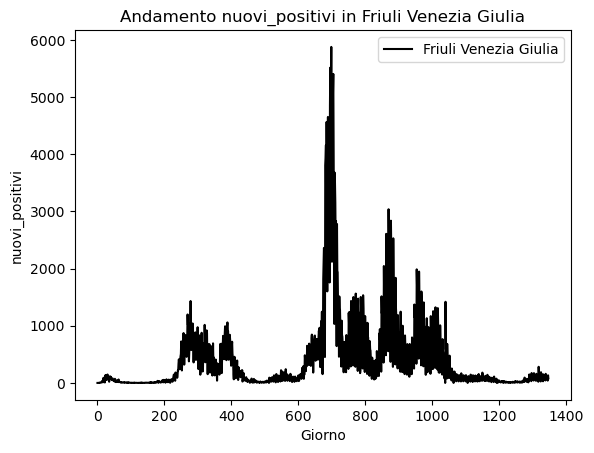

In [1066]:
plt.plot(x,y, color='black', label=regione)
plt.title("Andamento {} in {}".format(var,regione) )
plt.ylabel(var)
plt.xlabel('Giorno')
plt.legend()
plt.show()

# Parte 2

Definisco le due funzioni date per descrivere l'andamento dei contagi, ovvero la funzione logistica (ottima per modellare la crescita di contagi) e la funzione di Gompertz ( ottima soprattutto per modellarne da decrescita)

In [1067]:
def logistica(Ntot,k,t0,t):
    deltat=[i-t0 for i in t]
    logi=[Ntot/(1+np.exp(-k*(i))) for i in deltat]
    return logi

In [1068]:
def gompertz(Ntot,k,t0,t):
    deltat=[i-t0 for i in t]
    gomp=[Ntot*np.exp(-np.log(Ntot)*np.exp(-k*(i))) for i in deltat]
    return gomp

Ne osservo gli andamenti in base ai parametri inseriti

In [1069]:
k=0.07
Ntot=1000.
t0=0.

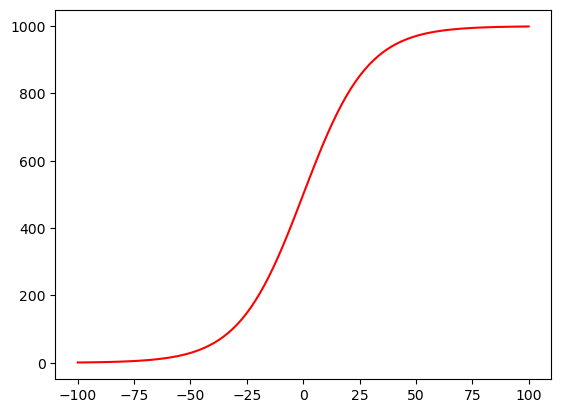

In [1070]:
t=np.linspace(-100,100,100)

logi= logistica(Ntot,k,t0,t)

plt.plot(t, logi, color='red')
plt.show()

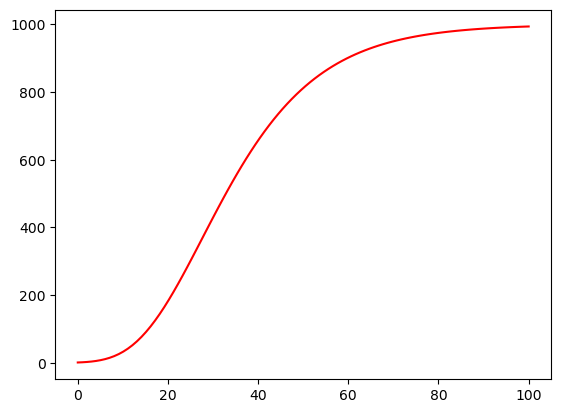

In [1071]:
t=np.linspace(0,100,100)

gomp= gompertz(Ntot,k,t0,t)

plt.plot(t, gomp, color='red')
plt.show()

Costruisco le due funzioni che mi danno la possibilità di calcolare la differenza tra due giorni consecutivi, sia per la funzione logistica che quella di gompertz. Ho quindi definito la funzione che calcola, ad esempio, il valore della logistica al giorno i+1 e sottratto poi quella al giorno i. Analogamente faccio per la funzione di Gompertz

In [1072]:
def ndifflogi(Ntot,k,t0,t):
    logi10=logistica(Ntot,k,t0,t)
    logi=np.zeros_like(logi10)
    logi[0]=logi10[0]
    for g in range(1,len(logi10)):
        logi[g]=logi10[g]-logi10[g-1]
    return logi

In [1073]:
def ndiffgomp(Ntot,k,t0,t):
    gomp10=gompertz(Ntot,k,t0,t)
    gomp=np.zeros_like(gomp10)
    gomp[0]=gomp10[0]
    for g in range(1,len(gomp10)):
        gomp[g]=gomp10[g]-gomp10[g-1]
    return gomp

Ora grazie alle 2 nuove funzioni che ho definito precedentemente ne faccio i grafici per vedere che andamenti hanno

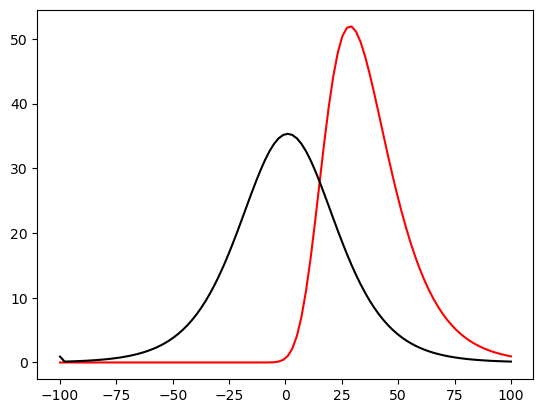

In [1074]:
t=np.linspace(-100,100,100)

gomp= ndiffgomp(Ntot,k,t0,t)
logi= ndifflogi(Ntot,k,t0,t)

plt.plot(t, gomp, color='red')
plt.plot(t, logi, color='black')
plt.show()



# Parte 3

Per questa parte seleziono l'intervallo richiesto della prima ondata, ovvero, l'intervallo che va dal 30 Marzo 2020 e lungo 35 giorni e lo grafico per vederne fisicamente l'andamento. Il numero di nuovi positivi giornalieri è stato trovato selezionando i giorni interessati dalla lista y comprensiva di tutti i giorni

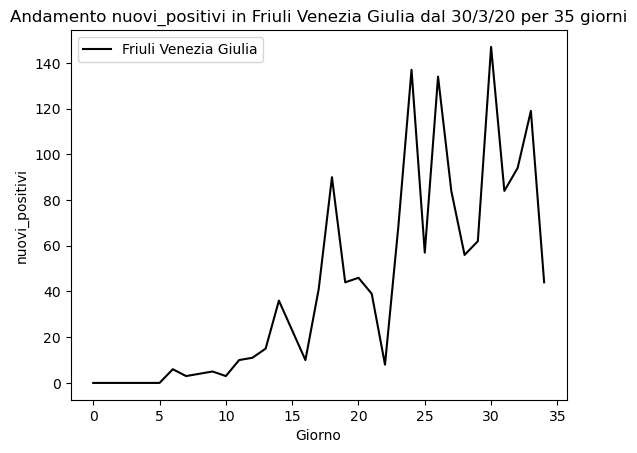

In [1075]:
posizione1=(dati1.index[dati1['data'] == '2020-02-24T18:00:00'].tolist())
pos1=int((posizione1[0]-5)/21)
dati34=dati1.head(36)

x35=[i for i in range(35)]
y35=y[pos1:pos1+35]

dati35=np.array([x35,y35])

x100=[i for i in range(100)]
y100=y[pos1:pos1+100]

dati100=np.array([x100,y100])


plt.plot(x35,y35, color='black', label=regione)
plt.title("Andamento {} in {} dal 30/3/20 per 35 giorni".format(var,regione) )
plt.ylabel(var)
plt.xlabel('Giorno')
plt.legend()
plt.show()

La consegna richiede la realizzazione poissoniana, dunque scrivo la funzione di likelihood come:
$$
L = \prod_{i} \left( \frac{\nu_i^{n_i} \cdot e^{-\nu_i}}{n_i!} \right)
$$
Dove $\nu_i$ rappresenta il valor medio calcolato attraverso la funzione logistica o di Gompertz. Per comodità la funzione la modifico in modo da calcolarne il logaritmo, facendo così al posto di una produttoria potrò lavorare con una sommatoria.

In [1076]:
def log_likelihood(theta, dati)->float:
    Ntot, k, t0 = theta
    n=dati[1]
    t=[i for i in range(35)]
    nu=ndifflogi(Ntot,k,t0,t)
    nu = np.maximum(nu, 1e-10)
    return np.sum(n*np.log(nu+ 1e-10)-nu)

Ora definisco un prior in modo da vincolare i valori $N_{tot}$ e $k$ maggiori o uguali a zero e posso dunque calcolare il logaritmo della posterior come la somma tra il logaritmo del prior e il logaritmo della likelihood calcolata in precedenza

In [1077]:
def log_prior(theta):
    Ntot, k, t0 = theta
    if Ntot and k >=0:
        return 0.0
    return -np.inf
    
def log_posterior(theta,dati):
    logprior=log_prior(theta)
    if not np.isfinite(logprior):
        return -np.inf
    return logprior + log_likelihood(theta, dati)

Ora avendo ottenuto una funzione di Likelihood a 3 parametri da massimizzare per trovare le migliori stime per $N_{tot}$, $k$ e $t_0$ sfrutto l'algoritmo dell'emcee che mi permette di trovare in maniera più rapida ed efficiente questi valori. Per dare ai walker un buon punto di partenza e velocizzare i conti ne cerco uno attraverso la funzione minimize

In [1078]:
np.random.seed(42)
num_passi=2000
nll = lambda *args: -log_posterior(*args)
initial = np.array([num_passi, 0.1,6])
soln = minimize(nll, initial, args=(dati35))
Ntotbf,kbf,t0bf = soln.x
print(soln.x)

[1.87364982e+03 2.14362375e-01 2.78216657e+01]


D:\Python\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


L'algoritmo di emcee è ottimo per stimare pochi parametri (tra 2 e 10, poi richiede molto tempo), ma allo stesso tempo varia molto in base ai parametri inziali dei walker. Dunque dopo qualche run ho deciso di far fare 2000 passi e ognuno di questi lungo $10^{-10}$ per ognuno dei 32 walker in modo da massimizzare, a mio parere, il rapporto precisione/tempo di esecuzione

In [1079]:
np.random.seed(42)
pos = soln.x *(1+ 1e-10 * np.random.randn(32, 3))
nwalkers, ndim = pos.shape

In [1080]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(dati35,))

Faccio quindi partire la run

In [1081]:
sampler.run_mcmc(pos, num_passi, progress=True);

100%|██████████| 2000/2000 [00:19<00:00, 103.21it/s]


Dopo aver fatto fare 2000 passi a tutti e 32 i walker ne grafico l'andamento attorno ai massimi di ogni parametro

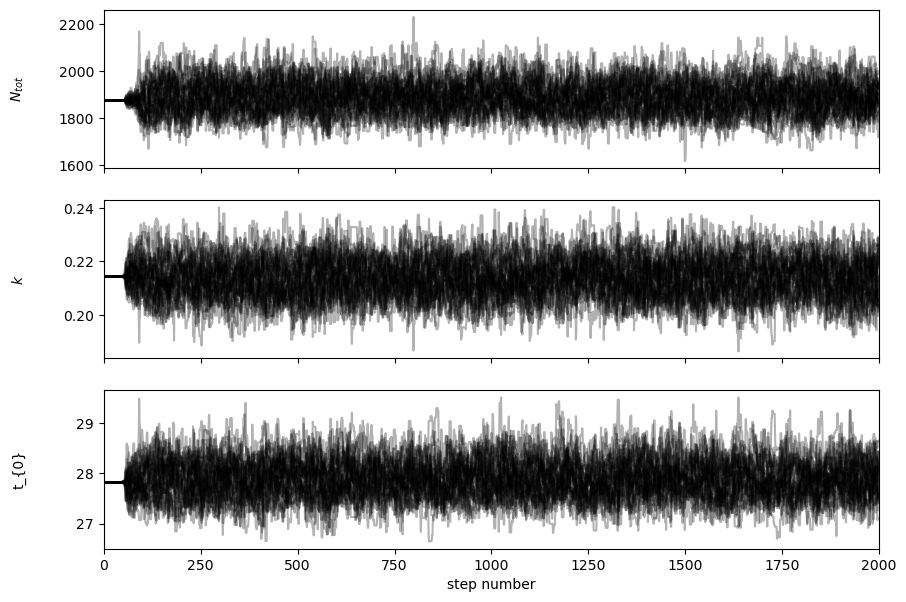

In [1082]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$N_{tot}$", "$k$","t_{0}"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [1083]:
tau = sampler.get_autocorr_time()
print(tau)

[36.12527204 32.52408613 34.60882142]


Scarto ora 300 tripletti di parametri $N_{tot}$, $k$ e $t_0$

In [1084]:
flat_samples = sampler.get_chain(discard=300, flat=True)
print(flat_samples.shape)

(54400, 3)


Prendo tutti i parametri ottenuti dentro l'array flat_samples e li grafico utilizzando GTC che mi permette sia di vedere l'andamento di come i parametri che ho stimato con emcee si distribuiscono e anche la correlazione per ogni coppia di parametri stimati

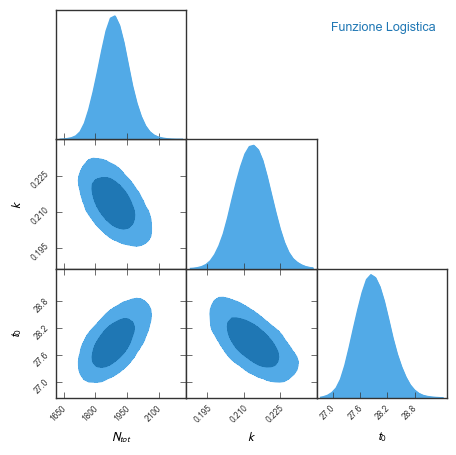

In [1085]:
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=['$N_{tot}$','$k$','$t_0$'],
                    chainLabels=['Funzione Logistica'],
                    figureSize='MNRAS_page')

Seleziono una riga a caso all'interno dell'array flat_samples che, come detto precedentemente, contiente tutti i tripletti $N_{tot}$, $k$ e $t_0$ generati con il metodo dell'emcee. In modo tale da costruire un array (test) che contiene tutti i valori dei nuovi positivi per ogni tripletto (dunque se i tripletti sono pari al numero di passi, l'array test avrà dimesioni il numero di giorni considerato nell'intervallo e il numero di passi effettuato dai walker).

In [1086]:
test=np.zeros((35,num_passi))
x35=[i for i in range(4,39)]
for i in range(num_passi):
    Ntot = flat_samples[np.random.randint(len(flat_samples[:,0])),0]
    k = flat_samples[np.random.randint(len(flat_samples[:,0])),1]
    t0 = flat_samples[np.random.randint(len(flat_samples[:,0])),2]
    test[:,i]=ndifflogi(Ntot,k,t0,x35)
    
    



Nel seguente modo posso vedere come varia il mio grafico nel punto della miglior stima con una deviazione standard come errore, rispetto al grafico dei valori veri provenienti da 'covid.csv'

Text(0, 0.5, 'Nuovi positivi')

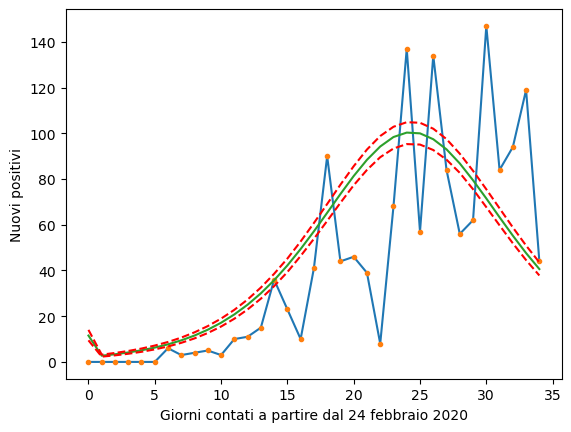

In [1087]:
x35=[i for i in range(35)]
plt.plot(x35, dati35[1], '-',label='nuovi positivi osservati')
plt.plot(x35, dati35[1], '.')
plt.plot(x35,np.percentile(test,50,axis=1), label='50° percentile')
plt.plot(x35,np.percentile(test,16,axis=1), '--',label='16° percentile',color='red')
plt.plot(x35,np.percentile(test,84,axis=1), '--',label='84° percentile',color='red')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
#plt.legend()
#plt.title('Confronto fra dati osservati e modello della funzione logistica per i primi 35 giorni')

Si nota subito come per i primi valori i parametri sono stati sovrastimati, mentre, al contrario, lungo la zona del picco questi siano sottostimati

Faccio la stessa cosa fatta in precedenza, ma in questo caso considero un intervallo di 100 giorni anzichè 35, ma continuo ad utilizzare la miglior stima calcolata in precedenza e vedo come questa si avvicini o meno ai valori veri

In [1088]:
test=np.zeros((100,num_passi))
x100=[i for i in range(100)]
for i in range(num_passi):
    Ntot = flat_samples[np.random.randint(len(flat_samples[:,0])),0]
    k = flat_samples[np.random.randint(len(flat_samples[:,0])),1]
    t0 = flat_samples[np.random.randint(len(flat_samples[:,0])),2]
    test[:,i]=ndifflogi(Ntot,k,t0,x100)

Text(0, 0.5, 'Nuovi positivi')

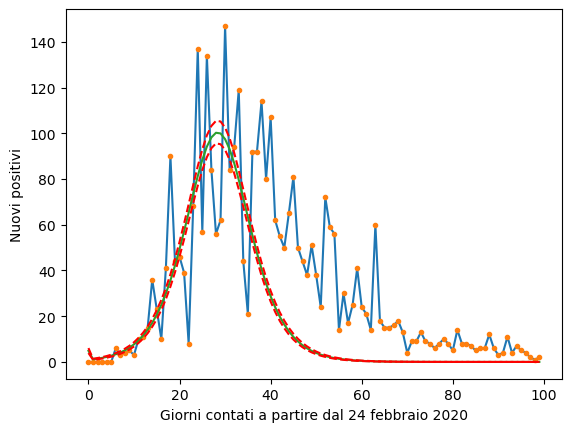

In [1089]:
plt.plot(x100, dati100[1], '-',label='nuovi positivi osservati')
plt.plot(x100, dati100[1], '.',label='nuovi positivi osservati')
plt.plot(x100,np.percentile(test,50,axis=1), label='50° percentile')
plt.plot(x100,np.percentile(test,16,axis=1), '--',label='16° percentile',color='red')
plt.plot(x100,np.percentile(test,84,axis=1), '--',label='84° percentile',color='red')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
#plt.legend()
#plt.title('Confronto fra dati osservati e modello della funzione logistica per i primi 35 giorni')

Come prima resta che i valori sono stati prima sovrastimati e poi sottostimati nel picco, ma anche per quanto riguarda i successivi 65 giorni la funzione rimane sottostimata, e con sè anche l'errore sembra molto piccolo. Sicuramente parte della casua è che il set di dati analizzato è molto piccolo e uno di 100 giorni avrebbe dato sicuramente parametri più vicini al valore vero

Rifaccio gli stessi passaggi anche per la funzione di Gompertz

In [1090]:
def log_likelihood(theta, dati)->float:
    Ntot, k, t0 = theta
    n=dati[1]
    t=[i for i in range(35)]
    nu=ndiffgomp(Ntot,k,t0,t)
    return np.sum(n*np.log(nu+ 1e-10)-nu)

In [1091]:
def log_prior(theta):
    Ntot, k, t0 = theta
    if Ntot and k >=0:
        return 0.0
    return -np.inf
    
def log_posterior(theta,dati):
    logprior=log_prior(theta)
    if not np.isfinite(logprior):
        return -np.inf
    return logprior + log_likelihood(theta, dati)

In [1092]:
np.random.seed(42)
num_passi=2000
nll = lambda *args: -log_posterior(*args)
initial = np.array([num_passi, 0.1,6])
soln = minimize(nll, initial, args=(dati35))
Ntotbf,kbf,t0bf = soln.x
print(soln.x)

[3.15369164e+03 7.83955039e-02 3.82942623e+00]


In [1093]:
np.random.seed(42)
pos = soln.x *(1+ 1e-10 * np.random.randn(32, 3))
nwalkers, ndim = pos.shape

In [1094]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(dati35,))

In [1095]:
sampler.run_mcmc(pos, num_passi, progress=True);

100%|██████████| 2000/2000 [00:26<00:00, 74.33it/s]


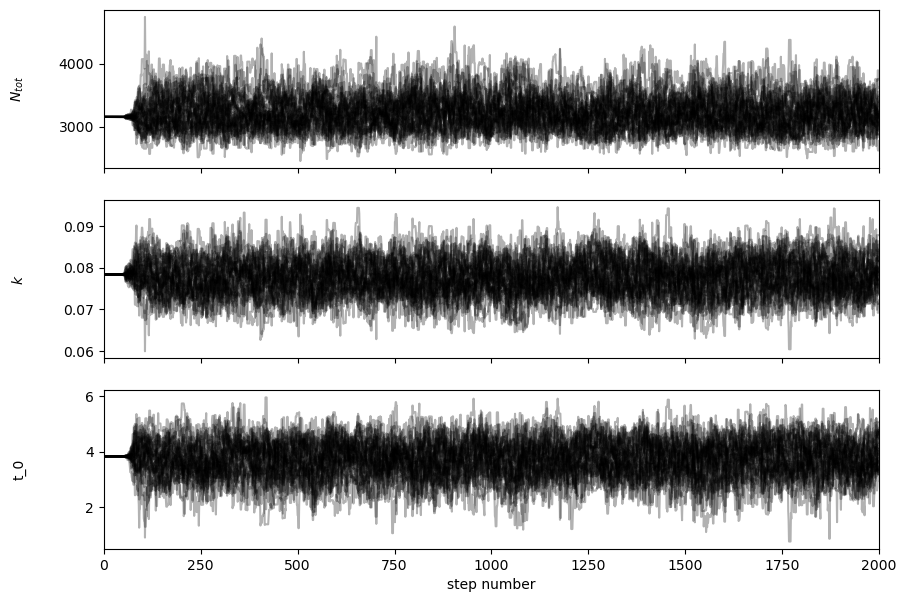

In [1096]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$N_{tot}$", "$k$","t_0"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [1097]:
tau = sampler.get_autocorr_time()
print(tau)

[33.75864465 33.73459158 33.32680434]


In [1098]:
flat_samples = sampler.get_chain(discard=300, flat=True)
print(flat_samples.shape)

(54400, 3)


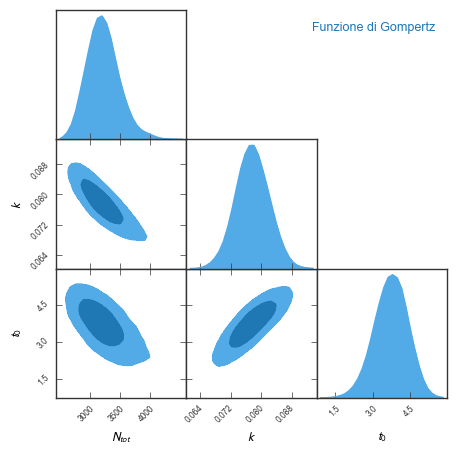

In [1099]:
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=['$N_{tot}$','$k$','$t_0$'],
                    chainLabels=['Funzione di Gompertz'],
                    figureSize='MNRAS_page')

In [1100]:
test=np.zeros((35,num_passi))
x35=[i for i in range(35)]
for i in range(num_passi):
    Ntot = flat_samples[np.random.randint(len(flat_samples[:,0])),0]
    k = flat_samples[np.random.randint(len(flat_samples[:,0])),1]
    t0 = flat_samples[np.random.randint(len(flat_samples[:,0])),2]
    test[:,i]=ndiffgomp(Ntot,k,t0,x35)

Text(0, 0.5, 'Nuovi positivi')

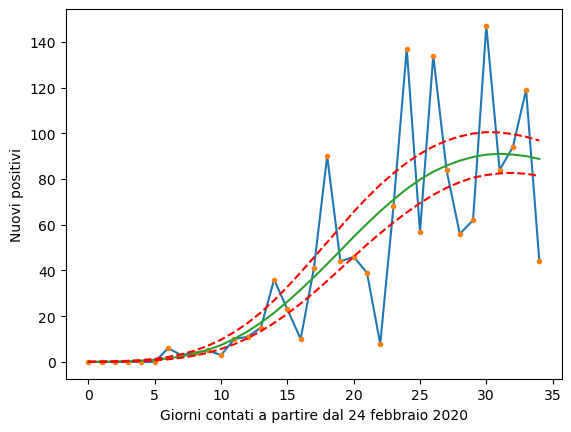

In [1101]:
x35=[i for i in range(35)]
plt.plot(x35, dati35[1], '-',label='nuovi positivi osservati')
plt.plot(x35, dati35[1], '.',label='nuovi positivi osservati')
plt.plot(x35,np.percentile(test,50,axis=1), label='50° percentile')
plt.plot(x35,np.percentile(test,16,axis=1), '--',label='16° percentile',color='red')
plt.plot(x35,np.percentile(test,84,axis=1), '--',label='84° percentile',color='red')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
#plt.legend()
#plt.title('Confronto fra dati osservati e modello della funzione logistica per i primi 35 giorni')

In [1102]:
test=np.zeros((100,num_passi))
x100=[i for i in range(100)]
for i in range(num_passi):
    Ntot = flat_samples[np.random.randint(len(flat_samples[:,0])),0]
    k = flat_samples[np.random.randint(len(flat_samples[:,0])),1]
    t0 = flat_samples[np.random.randint(len(flat_samples[:,0])),2]
    test[:,i]=ndiffgomp(Ntot,k,t0,x100)

Text(0, 0.5, 'Nuovi positivi')

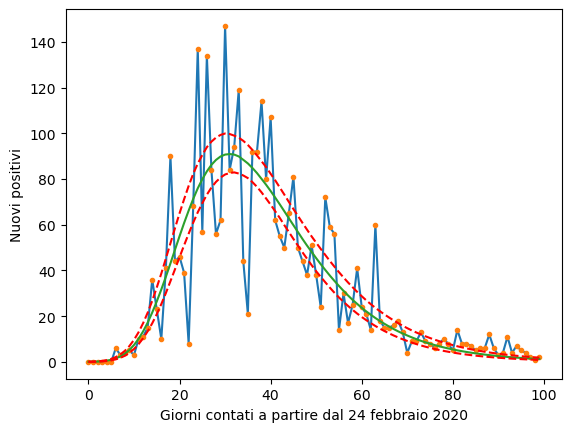

In [1103]:
plt.plot(x100, dati100[1], '-',label='nuovi positivi osservati')
plt.plot(x100, dati100[1], '.',label='nuovi positivi osservati')
plt.plot(x100,np.percentile(test,50,axis=1), label='50° percentile')
plt.plot(x100,np.percentile(test,16,axis=1), '--',label='16° percentile',color='red')
plt.plot(x100,np.percentile(test,84,axis=1), '--',label='84° percentile',color='red')
plt.xlabel('Giorni contati a partire dal 24 febbraio 2020')
plt.ylabel('Nuovi positivi')
#plt.legend()
#plt.title('Confronto fra dati osservati e modello della funzione logistica per i primi 35 giorni')

# Parte 4

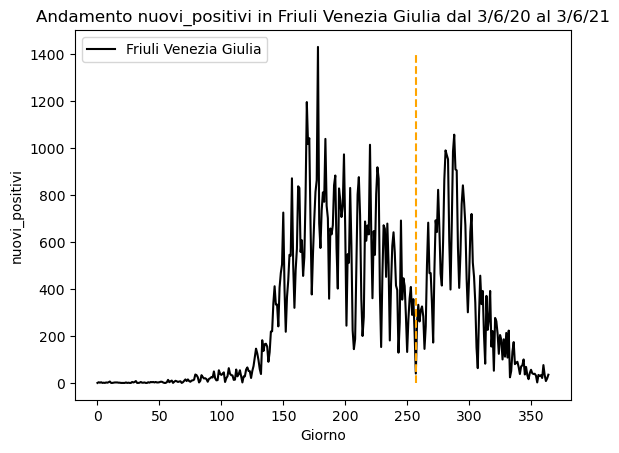

In [1104]:
posizione1=(dati1.index[dati1['data'] == '2020-06-03T17:00:00'].tolist())
posizione2=(dati1.index[dati1['data'] == '2021-06-03T17:00:00'].tolist())
pos1=int((posizione1[0]-5)/21)
pos2=int((posizione2[0]-5)/21)
x365=[i for i in range(365)]
y365=y[pos1:pos2]

a=[0,1400]
b=[257,257]

plt.plot(x365,y365, color='black', label=regione)
plt.plot(b,a, '--', color= 'orange')
plt.title("Andamento {} in {} dal 3/6/20 al 3/6/21".format(var,regione) )
plt.ylabel(var)
plt.xlabel('Giorno')
plt.legend()
plt.show()

Guardando il precedente grafico si possono distinguere 2 picchi, uno in coincidenza di circa il 180° giorno e il secondo attorno al 290°. Per questo motivo dividerei il grafico in due parti, la prima dal primo fino al 257° giorno circa e la seconda dal 257° fino alla fine della raccolta dati. Analizzo come fatto in precedenza per i 35 giorni e stimo i 6 nuovi parametri, ovvero $N_{tot,1}$, $k_1$ e $t_{0,1}$ e $N_{tot,2}$, $k_2$ e $t_{0,2}$, rispettivamente per la prima e seconda parte dell'intervallo 